In [9]:
import pandas as pd
from pycaret.classification import *
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import average_precision_score
from model_utils import *

In [11]:
mlflow.set_tracking_uri("http://localhost:5000")

In [12]:
df_train, df_test = get_raw_data()
clf1 = setup(data = df_train, 
             target = 'target',
             silent=True,
             log_experiment = True,
             use_gpu=False,
             experiment_name = 'selected_model',
             fix_imbalance = True, 
             transformation = True, 
             polynomial_features = True,
            )
add_metric('apc', 'APC', average_precision_score, target = 'pred_proba')
best = compare_models(sort="APC", 
                      include=["lightgbm", "et", "rf", "lr", "gbc"],
                     probability_threshold=0.5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,APC,TT (Sec)
et,Extra Trees Classifier,0.9744,0.9749,0.8458,0.9811,0.9073,0.8926,0.8966,0.9445,0.3080
rf,Random Forest Classifier,0.9738,0.9746,0.8583,0.9639,0.9062,0.8910,0.8943,0.9427,0.5430
lr,Logistic Regression,0.9508,0.9699,0.9016,0.8015,0.8472,0.8181,0.8211,0.9417,0.0640
lightgbm,Light Gradient Boosting Machine,0.9674,0.9723,0.8585,0.9213,0.8871,0.8681,0.8699,0.9416,1.7660
gbc,Gradient Boosting Classifier,0.9629,0.9699,0.8714,0.8850,0.8761,0.8544,0.8558,0.9399,1.9560


In [13]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

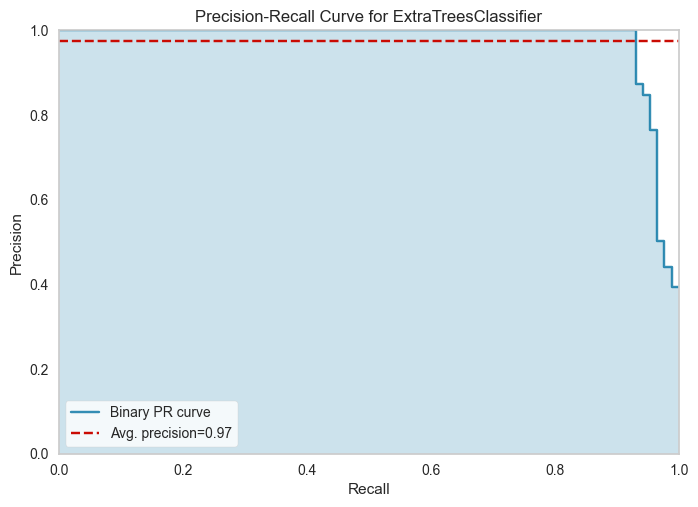

In [14]:
plot_model(best, plot = 'pr')

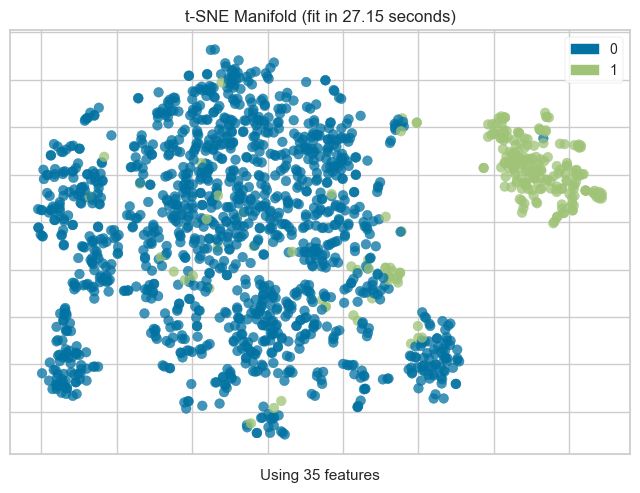

In [15]:
plot_model(best, plot = 'manifold')

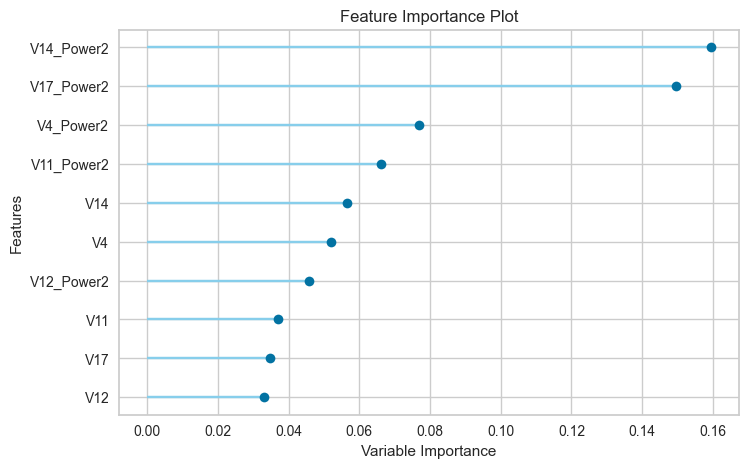

In [16]:
plot_model(best, plot="feature")

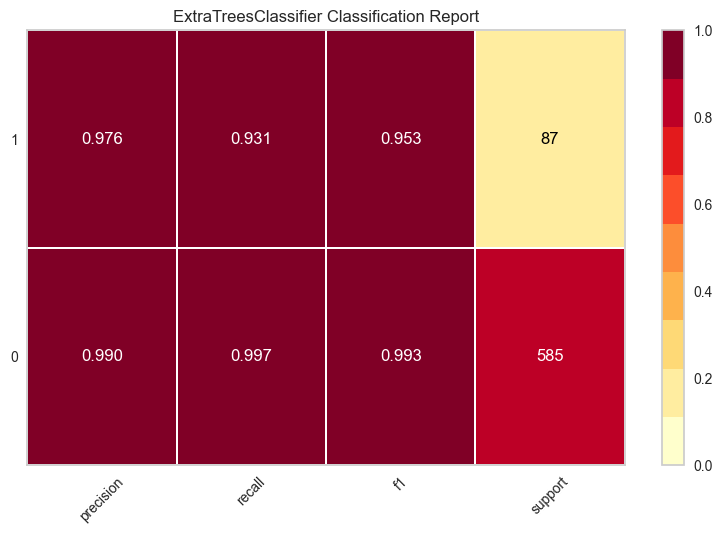

In [22]:
plot_model(best, plot="class_report")